<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Having Fun with Python: World Population Analysis</h1>
    <p class="lead">Extra Credit Homework Assignment</p>
    
  </div>
</div>

<div class="card mb-3" style="max-width: 540px;">
  <div class="row no-gutters">
    <div class="col-md-4">
      <img src="Data/English/Scanned_documents/t2.tif" class="card-img" alt="...">
    </div>
    <div class="col-md-8">
      <div class="card-body">
        <h5 class="card-title">Task</h5>
        <p class="card-text">Extract data from a "World Population" PDF. unfortunately the client was only able to obtain a copy of the data and no time to request another format. Analysis needs to be done using Python Pandas</p>
        <p class="card-text"><small class="text-muted">Use: Pandas, Regex, and Plotting</small></p>
      </div>
    </div>
  </div>
</div>


Overall Steps:
* Convert image data to string (OCR)
* User Regex for Data Cleanup and Extraction
* Convert data to a Pandas DataFrame
* Plotting
* Final Analysis



# 1. Load Our Libraries

Before we start let's make sure we have all the libraries installed and loaded. If you don't have these installed from a prior exercise you can run from your terminal

```bash
pip install -r requirements.txt
```

or


```bash
conda install --yes -c conda-forge --file requirements.txt
```

In this assignment we wil be using:
* `tabula`: is actually a python wrapper to `tabula java` which a library for extracting tables from PDF files
* `pytesseract`: Python-tesseract is a wrapper for [Google's Tesseract-OCR Engine](https://github.com/tesseract-ocr/tesseract).
* `PIL`: Python Imaging Library (PIL) adds image processing capabilities to your Python interpreter. This library supports many file formats, and provides powerful image processing and graphics capabilities.
* `pandas`: Easy-to-use data structures and data analysis tools in Python
* `re`:  a Python module which provides regular expression matching operations

In [ ]:
# conda install --yes -c conda-forge --file requirements.txt

In [1]:
import pdf2image
import tabula
import pytesseract
import PIL
import pandas as pd
import re
import os
# import img2pdf

## Let's explore `tabula` library and see it is used in general
* `tabula.environment_info()` shows environment information for reporting. Returns detailed information like Python version, Java version, or OS environment, etc. Let's see it in action:

In [ ]:
tabula.environment_info()

### Use `tabula` to read a PDF file and convert it into a `panda.DataFrame`
Example: We have `Q3 FY19 Consolidated Financial Statements.pdf` which is Apple's latest Financial Report, which has multiple pages. By default, tabula will read the first page, which is fine for our testing. Let's see it in action before we run it on `worldpopulation.pdf` since this financial statement is nicely formatted and gives us a feeling on how this library works.

In [ ]:
apple_df = tabula.read_pdf("Data/Q3 FY19 Consolidated Financial Statements.pdf")
apple_df.head()

The headers are not correct, and we probably need to make some adjustments. If we examing the documentation we see `pandas_options={'header': None}` option. Let's give it try:

In [ ]:
apple_df = tabula.read_pdf("Data/Q3 FY19 Consolidated Financial Statements.pdf", pandas_options={'header':None})
apple_df.head(10)

We diffentely need to do more work to clean this up. But this is not our task, we need to read `worldpopulation.pdf`. 

## Q1: Use `tabula` to read and convert the pdf into a dataframe (5pts)

In [ ]:
import os

def pdf2panda(file):
    ## Your code
    df=tabula.read_pdf(file)
    
    
    return df

In [ ]:
#Test Data/English/Scanned_documents/worldpopulations.pdf
file = os.path.join("Data", "English", "Scanned_documents", "worldpopulations.pdf")
output = pdf2panda(file)
print(output)

If the output says `file is empty` then we know `tabula` is not a good choice. Mainly, because this PDF obiously was created from an image which means we need to figure out other options

# 2. Extracting our Text 

## Explore other options with `pytesseract` 
To use `pytesseract` OCR we first need to convert ther PDF to an image, and then use the OCR to extract text from that image. 

* We will use `pdf2image` library to convert the PDF into an image
* Use `pytesseract` to extract text from that image

Let's try this using the Apple data for a test run. 

In [ ]:
pages = pdf2image.convert_from_path("Data/Q3 FY19 Consolidated Financial Statements.pdf")
for page in pages:
    page.save('apple.jpg', 'JPEG')

To validate we can open the image using `PIL.Image.open` as in below:

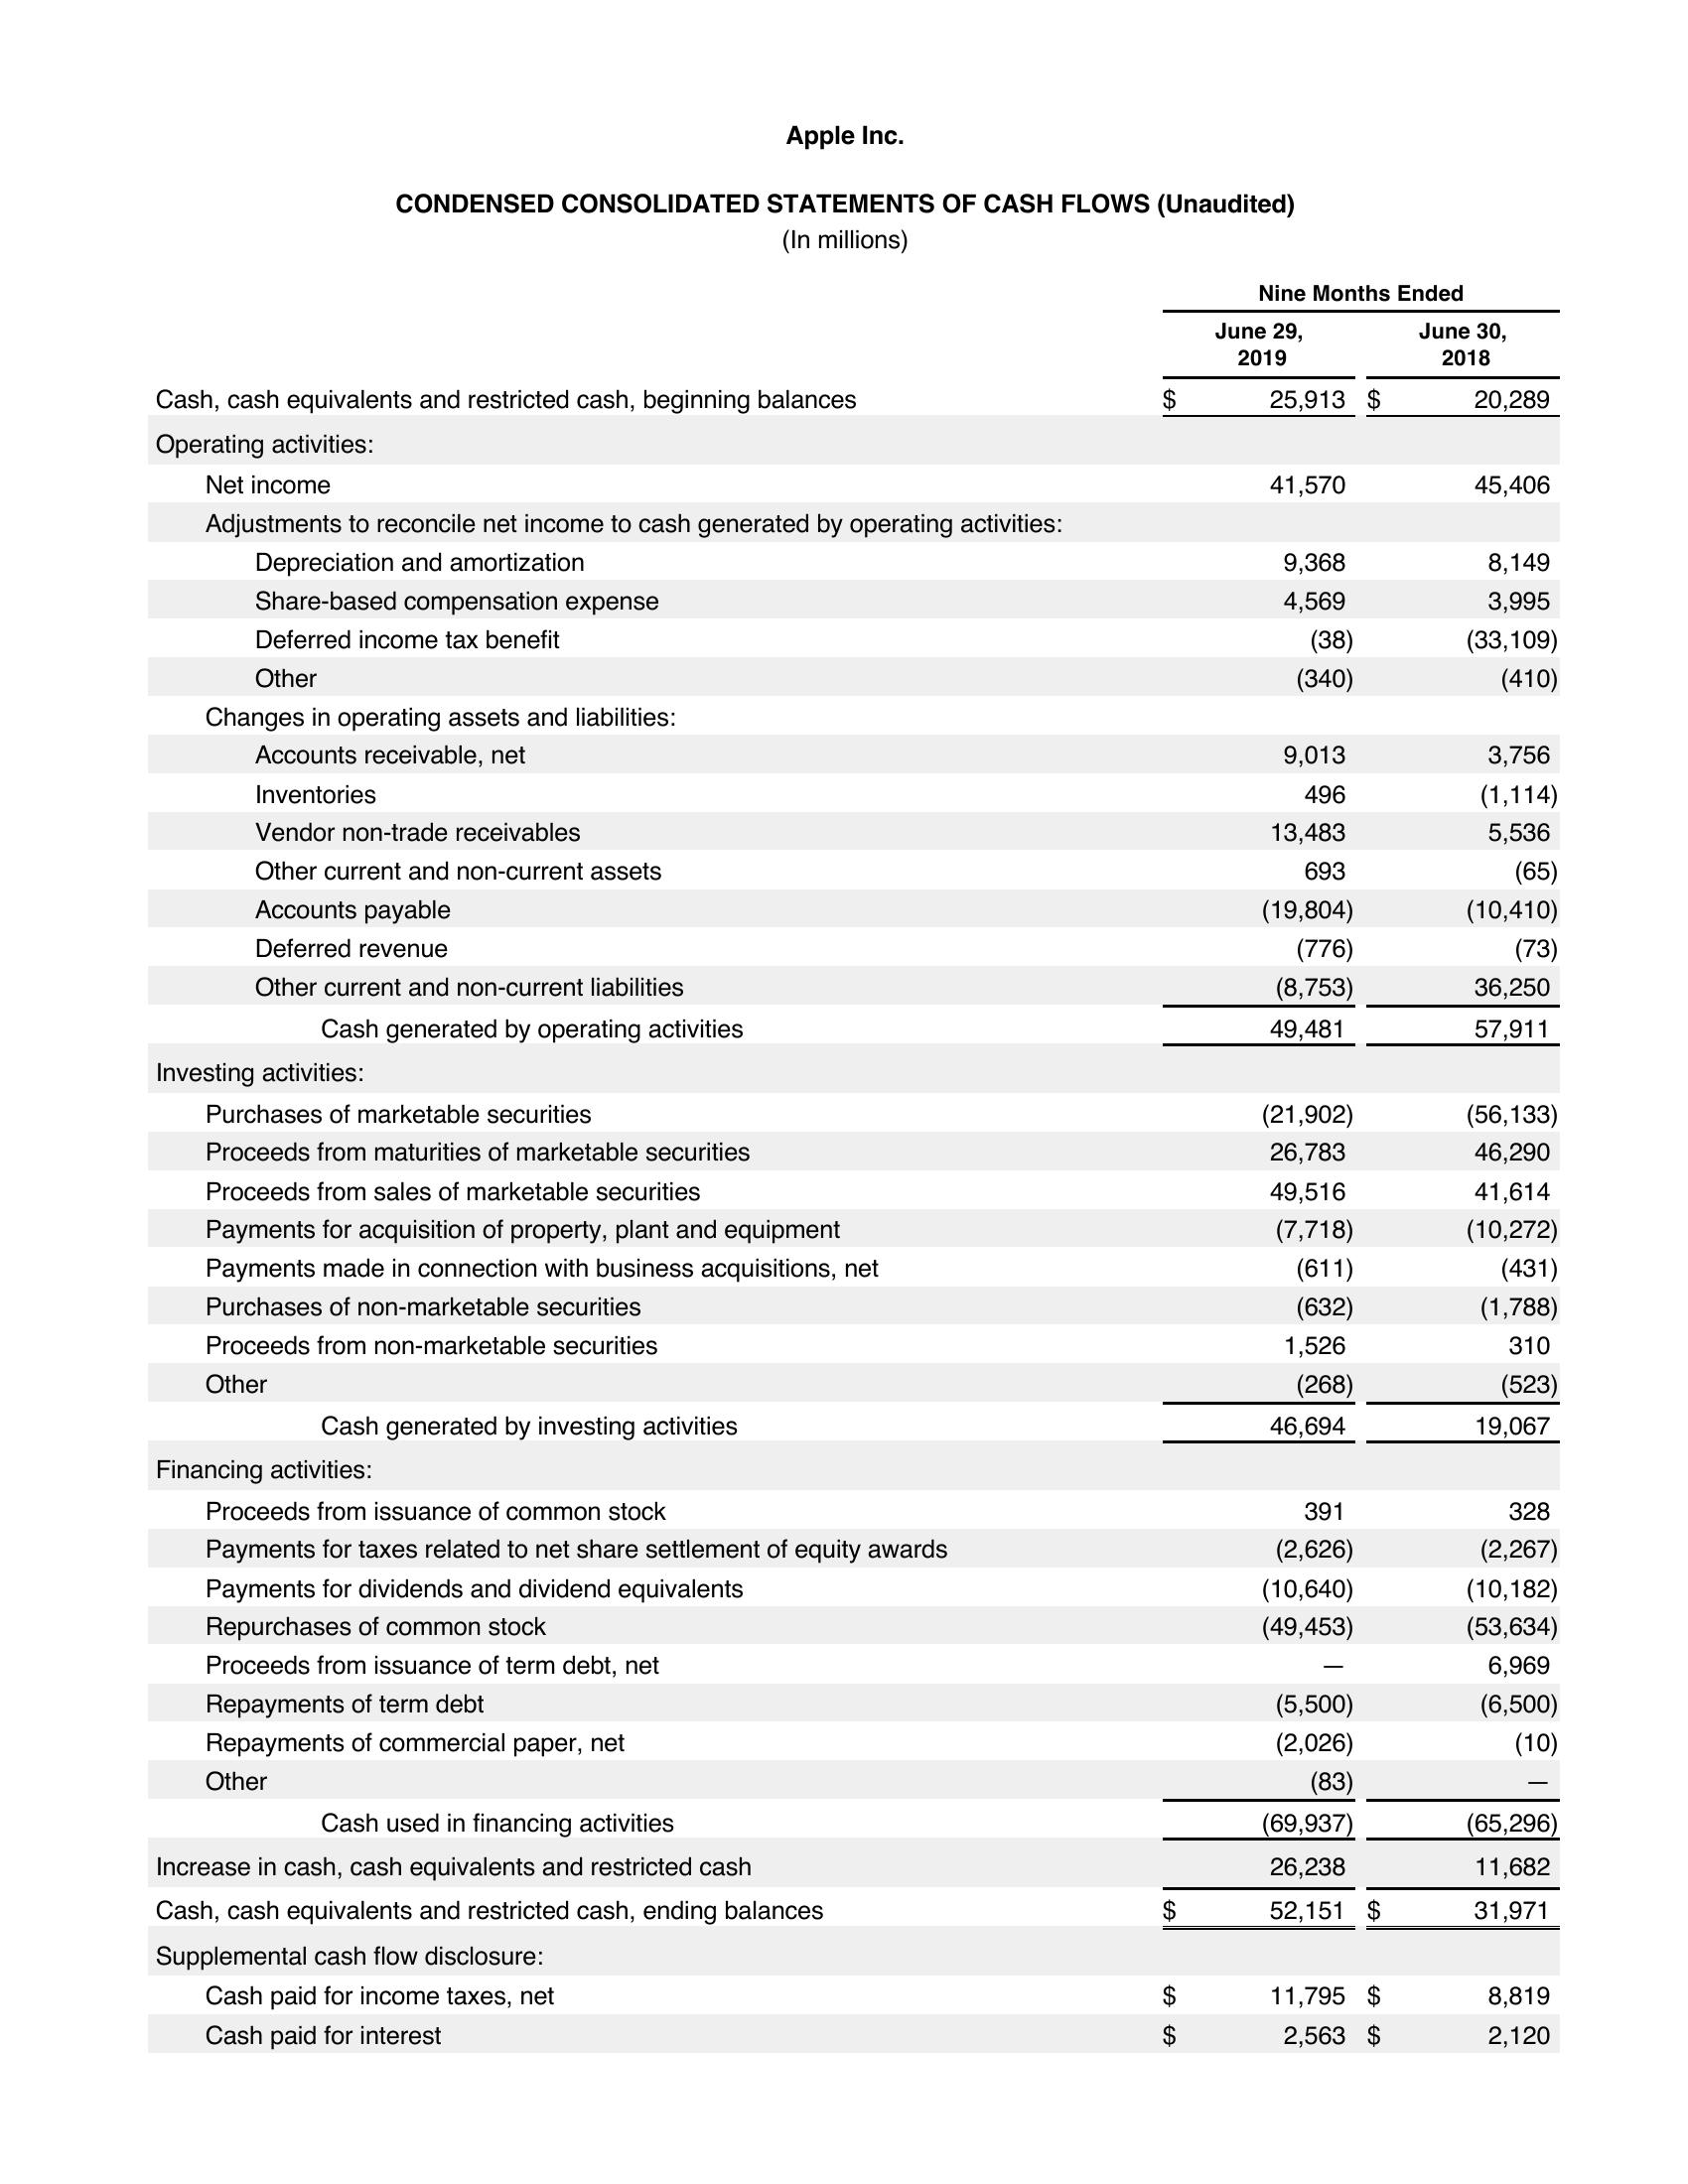

In [5]:
PIL.Image.open('apple.jpg')

Generally, `pdf2image` returns a PIL iterable object. We can actually pass it directly to `pytesseract` and skip the need to save that image. Let's see that in action:

In [ ]:
# add this line for tesseract to work
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
pages = pdf2image.convert_from_path("Data/Q3 FY19 Consolidated Financial Statements.pdf")
for content in pages:
    print(pytesseract.image_to_string(content))

## Q2: Write a function that converts a PDF into an image and then pass it to the OCR. The function should return a list (5 pts)


In [ ]:
def convertPDF(pdffile):
    ## ADD YOUR CODE
    pages = pdf2image.convert_from_path(pdffile)
    datalist = []
    for content in pages:
        datalist.append(pytesseract.image_to_string(content))
    
    ## return a python list that contains data extract per page
    
    return datalist
    

In [ ]:
#test 1
file = os.path.join("Data", "Q3 FY19 Consolidated Financial Statements.pdf")
imagesdata = convertPDF(file)
print(f'number of images processed = {len(imagesdata)}')
print(imagesdata)

In [ ]:
# test 2
file = os.path.join("Data", "English", "Scanned_documents", "worldpopulations.pdf")
imagesdata = convertPDF(file)
print(f'number of images processed = {len(imagesdata)}')
print(imagesdata)

## Q3: Display the image (5 pts)
We also have the image in a higher resolution format. After investigating the quality of the OCR above (notice for example Egypt and some countries are missing), is that the PDF was actually created from an Image. So convering back to an image reduced the quality. Let's examine the image that the analyst forgot to share with us.

In [10]:
file = os.path.join("Data", "English", "Scanned_documents", "t2.tif")
## YOUR CODE HERE
print (PIL.PILLOW_VERSION)

6.2.1


We will apply OCR again and compare the quality of the outcoome

In [ ]:
data = pytesseract.image_to_string(file)
data

## Q4 was there any difference? (5 pts)
Compare the length between the two outputs. Which one was higher?

In [ ]:
#Your Code HERE


## 3. Extracting data into a DataFrame
We can see there is a lot of `\n`, in order to view it in an easier to read format we can use print. Remember, this is a python list that we got back.

In [ ]:
print(data)

### Extracting Data using Regular Expressions `re`

There are many ways to use Regular Expression to come up with a propoer logic. We want to pick a simple solution to get us to what we want. In our case, we want a DataFrame that looks like this:

<img src='images/dataframe.png' width="500"/>

We don't need any of the data before `Egypt`. We need to capture all the data between `Egypt` to `Rome` according the text structure. Here is an example below:

In [ ]:
guestlist = "This is a list of the top 3 guests that attended the event, I am sendig it based on your request\nJohn Smith\nJames Bond\nJack Back\nLet me know if you need anything else"
print(guestlist)

In [ ]:
regex = re.compile(r'(John|Back)')
matches = regex.finditer(guestlist)

for match in matches:
    print(match)
                   

In [ ]:
# I Can store these in a list
regex = re.compile(r'(John|Back)')
matches = regex.finditer(guestlist)
idx = []
for match in matches:
    idx.append([match.start(), match.end()])
idx

So, this gave me the begining index (97) and ending index (128). What if I use that to slice the big chunk I need to work on?

In [ ]:
smaller = guestlist[idx[0][0]:idx[1][1]]
print(smaller)

## Q5 Extract a slice of data that containt the table information using regex (15 pts)

In [ ]:
## Your Code Here 


In [ ]:
# You should get something like this
print(idx)

In [ ]:
# test your results
# my new data slice should be 
dataslice = data[idx[0][0]:idx[1][1]]

In [ ]:
# Example result outcome 
print(dataslice)

## Q6 Now, use Regex again to extract the remaining data and insert into a Data Frame (15 pts)

Here are some suggested steps:
1. you can just focus on extracting each line and insert them into a list. The easiest way to think about it, each line luckily ends with `\n` so use Regex to define the beginning and ending of each line

here is an example outcome

```python
['Egypt 11.2 96.1 36 4 66 386,66 184 Cairo\n',
 'Nigeria 129.9 204.5 44 o 52 356,668 364 Abuja\n',
 'Ethiopia 67.7 117.6 44 3 52 426,371 159 Addis Ababa\n',
 'Tanzania 37.2 59.8 45 3 52 364,9 102 Dodoma\n',
 'Congo, Dem. Rep. of 562 106.0 48 3 49 905,351 61 Kinshasa\n',
 'South Africa 43.6 35.1 34 5 51 471,444 93 Pretoria\n',
 'Canada 31.3 36.0 19 13 79 3,849,670 8 Ottawa\n',
 'United States 287.4 346.0 21 13 77 3,/17,796 77 Washington, DC\n',
 'Mexico 101.7 131.7 33 5 75 756,062 135 Mexico City\n',
 'Argentina 36.5 47.2 28 10 74 1,073,514 34 Buenos Aires\n',
 'Brazil 173.8 219.0 30 6 69 3,300,154 53 Brasilia\n',
 'Colombia 43.8 59.7 33 o 71 439,734 100 Bogota\n',
 'Australia & Oceania 32 40 25 10 75 3,306,741 10\n',
 'Bangladesh 133.6 177.8 40 3 59 55,598 2,403 Dhaka\n',
 'India 1,049.5 1,363.0 36 4 63 1,269,340 827 New Delhi\n',
 'Pakistan 143.5 242.1 42 4 63 307,375 467 Islamabad\n',
 'Indonesia 217.0 281.9 31 5 68 735,355 295 Jakarta\n',
 'Philippines 80.0 115.5 37 4 68 115,83 691 Manila\n',
 'Vietnam 19.7 104.1 31 6 68 128,066 622 Hanoi\n',
 'China 1,280.7 1,454.7 23 7 71 3,696,100 347 Beijing\n',
 'Japan 127.4 121.1 14 18 81 145,869 873 Tokyo\n',
 'United Kingdom 60.2 64.8 19 16 78 94,548 637 London\n',
 'France 59.5 64.2 19 16 79 212,934 279 Paris\n',
 'Germany 82.4 78.1 16 16 78 137,83 598 Berlin\n',
 'Russia 143.5 129.1 18 13 65 6,592,819 22 Moscow\n',
 'Italy 58.1 57.5 14 19 80 116,32 499 Rome']
 ```

You can then loop through the array to further extract and transform your data into a nice dictionary that you can later on convert ito a pandas DataFrame:

```python
[{'Country': 'Egypt ',
  'Population (2002)': '11.2',
  'Project Population (2025)': '96.1'},
 {'Country': 'Nigeria ',
  'Population (2002)': '129.9',
  'Project Population (2025)': '204.5'},
 {'Country': 'Ethiopia ',
  'Population (2002)': '67.7',
  'Project Population (2025)': '117.6'},
 {'Country': 'Tanzania ',
  'Population (2002)': '37.2',
  'Project Population (2025)': '59.8'},
 {'Country': 'Congo, Dem. Rep. of ',
  'Population (2002)': '562',
  'Project Population (2025)': '106.0'},
 {'Country': 'South Africa ',
  'Population (2002)': '43.6',
  'Project Population (2025)': '35.1'},
 {'Country': 'Canada ',
  'Population (2002)': '31.3',
  'Project Population (2025)': '36.0'},
 {'Country': 'United States ',
  'Population (2002)': '287.4',
  'Project Population (2025)': '346.0'},
 {'Country': 'Mexico ',
  'Population (2002)': '101.7',
  'Project Population (2025)': '131.7'},
 {'Country': 'Argentina ',
  'Population (2002)': '36.5',
  'Project Population (2025)': '47.2'},
 {'Country': 'Brazil ',
  'Population (2002)': '173.8',
  'Project Population (2025)': '219.0'},
 {'Country': 'Colombia ',
  'Population (2002)': '43.8',
  'Project Population (2025)': '59.7'},
 {'Country': 'Australia & Oceania ',
  'Population (2002)': '32',
  'Project Population (2025)': '40'},
 {'Country': 'Bangladesh ',
  'Population (2002)': '133.6',
  'Project Population (2025)': '177.8'},
 {'Country': 'India ',
  'Population (2002)': '1,049.5',
  'Project Population (2025)': '1,363.0'},
 {'Country': 'Pakistan ',
  'Population (2002)': '143.5',
  'Project Population (2025)': '242.1'},
 {'Country': 'Indonesia ',
  'Population (2002)': '217.0',
  'Project Population (2025)': '281.9'},
 {'Country': 'Philippines ',
  'Population (2002)': '80.0',
  'Project Population (2025)': '115.5'},
 {'Country': 'Vietnam ',
  'Population (2002)': '19.7',
  'Project Population (2025)': '104.1'},
 {'Country': 'China ',
  'Population (2002)': '1,280.7',
  'Project Population (2025)': '1,454.7'},
 {'Country': 'Japan ',
  'Population (2002)': '127.4',
  'Project Population (2025)': '121.1'},
 {'Country': 'United Kingdom ',
  'Population (2002)': '60.2',
  'Project Population (2025)': '64.8'},
 {'Country': 'France ',
  'Population (2002)': '59.5',
  'Project Population (2025)': '64.2'},
 {'Country': 'Germany ',
  'Population (2002)': '82.4',
  'Project Population (2025)': '78.1'},
 {'Country': 'Russia ',
  'Population (2002)': '143.5',
  'Project Population (2025)': '129.1'},
 {'Country': 'Italy ',
  'Population (2002)': '58.1',
  'Project Population (2025)': '57.5'}]
 ```
 
then you can use `pd.DataFrame(dictionary)`

In [ ]:
# There are helper functions that you can use if you want to test if 
# specific string is number or float before casting to avoid errors

def isnumeric(x):
    try:
        num = float(x)
    except ValueError:
        return False
    return True

def isdigit(x):
    x = x.replace(',', '')
    try:
        num = int(x)
    except ValueError:
        return False
    return True

In [ ]:
## YOUR CODE HERE



## Q6: Pandas data cleanup and visualization (15 pts)

1. `Population 2002` and `Projected Population 2025` should be converted to floats. 
2. Create two pandas visualiztions like below (I have four, but create any two)

Interesting observation: It seems both China and India have the largest estimate for population in terms of future projection. But let's investigate this further. We have another dataset from World Bank regarding China that we will load and examine further to better understand our initial analysis. 

In [ ]:
china = pd.read_csv('Data/China/API_CHN_DS2_en_csv_v2_615059.csv', 
                    skip_blank_lines=True, 
                    skiprows=4)

In [ ]:
china.head()

In [ ]:
china.tail()

There are so many indicators. We just want to focus on two groups: Ages 15-64 we can refer to them as **Adults**, and ages 0-14 we can refer to them as **Children** 

In [ ]:
indicators = ['Population ages 15-64, total', 'Population ages 0-14, total']
chinapop = china[china['Indicator Name'].isin(indicators)].iloc[:,:-2]

In [ ]:
chinapop

In [ ]:
# let's pick one slice and examine Adults
adults = chinapop.iloc[:1, 4:]
adults

## Q7: Convert the `adults` to the format below (5 pts)
Hint: [pandas melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)


In [ ]:
## YOUR CODE HERE


In [ ]:
adults

## Q7 Rename the column `variable` to `year` (5 pts)

In [ ]:
# rename the columns

adults

We will set `year` as the DataFrame Index to get a Time Series plot

In [ ]:
adults = adults.set_index('year')
plt.figure(figsize=(12,5))
plt.plot(adults)

The graph has many issues. In order for Pandas to recognize this as a Time Series, the index which is currently as `object` needs to be converted to a `datetime`

In [ ]:
adults.index

## Q8: Convert the index to datetime (5 pts)

In [ ]:
#YOUR CODE HERE


In [ ]:
adults.index

In [ ]:
# Let's try the plot again
plt.figure(figsize=(12,5))
plt.plot(adults)

## Q9: Follow the sames steps but this time for the children (15 pts)

In [ ]:
children = chinapop.iloc[1:2, 4:]

# YOUR CODE HERE


In [ ]:
plt.figure(figsize=(12,5))
plt.plot(children)

## Q10: I was able to combine into one chart. When you look at this, do you see any alarming trend? What are your thoughts? (5 pts)


<img src="images/analysis.png"/>